# Lab 5 - EDA with Dimensionality Reduction
### Jackson Rolando

## Part 1 - Load the Data
We'll load the data from JSON files into a Pandas data frame:

In [1]:
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
objects = []
for file in glob.glob('./email_json/*.json'):
    with open(file) as f:
        objects.append(json.load(f))

In [3]:
df = pd.DataFrame(objects)
df.head()

,category,to_address,from_address,subject,body
0,ham,BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscrib...,BREAKING NEWS<breakingnews@foxnews.com>,FNC Alert,"PELOSI, REID SIGN WAR-SPENDING BILL THAT INCLU..."
1,spam,<theorize@plg.uwaterloo.ca>,"""cschai"" <cschai@syhmco.co.kr>",rtfmub,\n\n\n\n\n\n\n\nwyat\nlnpmoqrkhapibcegd\n\n\n\...
2,spam,"""Theorize"" <theorize@plg.uwaterloo.ca>","""Aegis Capital Group LLC"" <Estela.Burch@smapxs...",Invitation to fill in the vacant position of a...,"\n\n\n\nDear sirs,\nAegis Capital Gro..."
3,spam,warwickktwarwic@speedy.uwaterloo.ca,"""shar Nobis"" <sharNobis@autotradebuyer.co.uk>",Terrific gains possible!,http://s6.bilder-hosting.de/img/7LR4W.jpg\nImp...
4,ham,R-help@stat.math.ethz.ch,jessica.gervais@tudor.lu,[R] time serie generation,"\nDear all,\n\nI would like to generate a regu..."


The columns and types are as follows, we've changed the label to a categorical variable:

In [4]:
df.category = df.category.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   category      63542 non-null  category
 1   to_address    63141 non-null  object  
 2   from_address  63542 non-null  object  
 3   subject       63410 non-null  object  
 4   body          63542 non-null  object  
dtypes: category(1), object(4)
memory usage: 2.0+ MB


## Part 2 - Extract Features


Here we'll convert the message bodies to Bag of Word vectors:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
feat_mat = vectorizer.fit_transform(df.body)

print(feat_mat.shape)
print(feat_mat.sum())

(63542, 300984)
6885706


There are 63,542 rows (nonNull entries) and 300,984 columns (different words in the entire corpus). 

We'll inspect the matrix:

In [6]:
print(f'Length of list: {len(list(vectorizer.vocabulary_))}\n')

print('First ten entries:')
first_some_keys = list(vectorizer.vocabulary_)[:10]
for key in first_some_keys:
    print(f'{key}: {vectorizer.vocabulary_[key]}')

print()
def search_word(word):
    index = vectorizer.vocabulary_[word]
    print(f'index of {word}: {index}')
    column = feat_mat[:, index]
    print(f'column for "{word}":\n{column}')
    print(f'shape: {column.shape}')
    print(f'number of occurances: {column.sum()} out of {column.shape[0]} emails.\n')

words_to_search = ["work", "love", "different"]
for word in words_to_search:
    search_word(word)

Length of list: 300984

First ten entries:
pelosi: 216076
reid: 235309
sign: 249548
war: 285529
spending: 254951
bill: 99386
that: 266767
includes: 164213
iraq: 167840
pullout: 227377

index of work: 289649
column for "work":
  (2, 0)	1
  (22, 0)	1
  (30, 0)	1
  (37, 0)	1
  (49, 0)	1
  (67, 0)	1
  (75, 0)	1
  (92, 0)	1
  (93, 0)	1
  (100, 0)	1
  (114, 0)	1
  (121, 0)	1
  (126, 0)	1
  (127, 0)	1
  (130, 0)	1
  (134, 0)	1
  (149, 0)	1
  (151, 0)	1
  (153, 0)	1
  (156, 0)	1
  (159, 0)	1
  (170, 0)	1
  (176, 0)	1
  (189, 0)	1
  (207, 0)	1
  :	:
  (63371, 0)	1
  (63376, 0)	1
  (63384, 0)	1
  (63385, 0)	1
  (63386, 0)	1
  (63398, 0)	1
  (63410, 0)	1
  (63421, 0)	1
  (63428, 0)	1
  (63438, 0)	1
  (63444, 0)	1
  (63461, 0)	1
  (63467, 0)	1
  (63473, 0)	1
  (63474, 0)	1
  (63476, 0)	1
  (63480, 0)	1
  (63482, 0)	1
  (63490, 0)	1
  (63504, 0)	1
  (63516, 0)	1
  (63527, 0)	1
  (63528, 0)	1
  (63532, 0)	1
  (63536, 0)	1
shape: (63542, 1)
number of occurances: 6466 out of 63542 emails.

index of lo

## Part 3 - Dimensionality Reduction
We'll combine several columns with high covariance:

In [7]:
from sklearn.decomposition import TruncatedSVD

condenser = TruncatedSVD(n_components=10)
condensed_mat = condenser.fit_transform(feat_mat)

[0.05291813 0.02548106 0.01589105 0.01204943 0.0125203  0.00997942
 0.0096945  0.00913629 0.00739745 0.00726841]


<BarContainer object of 10 artists>

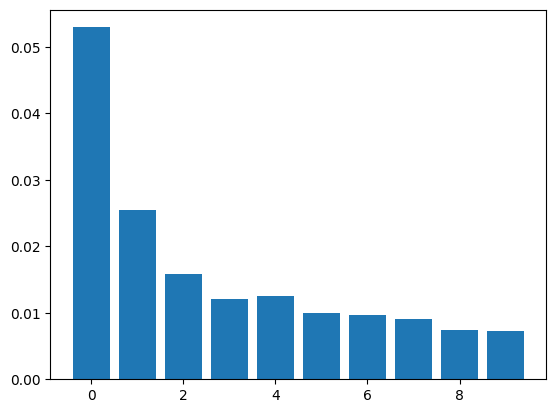

In [8]:
print(condenser.explained_variance_ratio_)
plt.bar(np.arange(condenser.explained_variance_ratio_.size), condenser.explained_variance_ratio_)

The first two components have the highest explained variance ratios, over 50%, meaning they represent most of the variance in the original data. 

## Part 4 - Visualization

We'll plot the components with the highest explained variance:

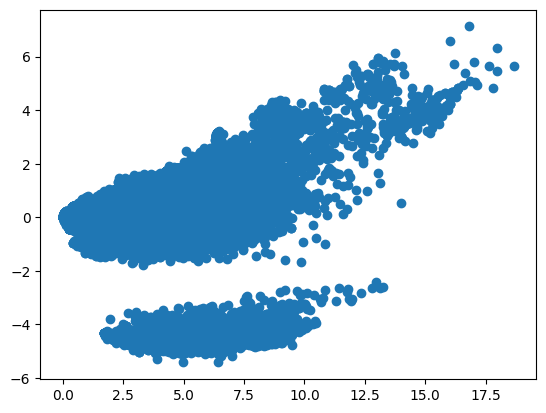

In [9]:
i, j = (0, 1)
plt.scatter(condensed_mat[:, i], condensed_mat[:, j])

Here we'll add labels and color-coding to the mix:

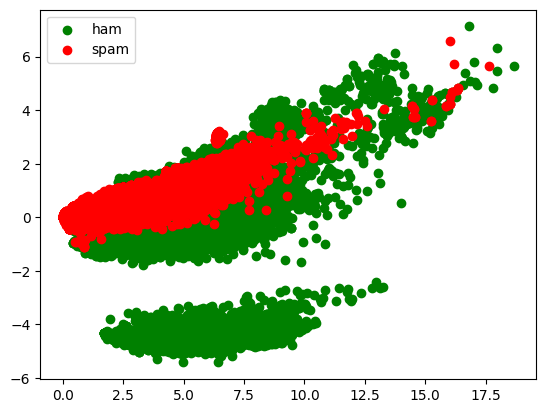

In [13]:
colors = {'ham': 'green', 'spam': 'red'}

fig, ax = plt.subplots()
for label in np.unique(df["category"]):
    indices = np.where(df["category"] == label)
    ax.scatter(condensed_mat[indices, i], condensed_mat[indices, j], label=label, c=colors[label])
ax.legend()
plt.show()

## Reflection Questions:
1. Each JSON file has a sender email, a receiver email, a subject, the body of the message, and whether the message was ham or spam. The body is the content of the email, a corpus that we're encoding.
2. 63542 * 300984 * 4 = 76.5 GB: Wow, I definitely do not have this much RAM.
3. 6885706 nonzero entries * (4 bytes + 4 bytes) + 63542 rows * 4 bytes = 55.3 MB: much less memory here. 
4. 100 * 6885706 nonzero entries / (63542 rows * 300984 columns) = 3.6% filled
5. A sparse matrix is not only ideal for this application, but required in order to run on any normal computer. There isn't enough memory to hold the entire filled matrix, potentially not even enough disk storage on my machine. The sparse matrix makes the matrix computable.
6. There are two main groups in the data, with very few points outside the clusters. This is generally true for the other columns as well. This makes sense, as the new matrix tries to preserve the spread of the original data. Since most of the variance is preserved with the firs column, it makes sense for it to spread wider than the next column, which still has a good amount of spread, but not as much, hence the horizontal groupings.
7. Adding in the labels, it looks like the ham messages have some key features that spam messages do not, and the spam messages probably consist mostly of very common wordings, contained in all emails. 